#### Importing modules

In [73]:
import pandas as pd
import string
import re

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score


#### Collecting data

In [74]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [75]:
print(f'{df.head()}\n{df.shape}\n{df.columns}')

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
(5572, 5)
Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


# Data Cleaning

In [76]:
#find number of null values in each column
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [77]:
#data cleaning on the data permanently
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [78]:
df.rename(columns={'v1':'label','v2':'email'},inplace=True)
df.head()

,label,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [79]:
df.columns.to_list()

['label', 'email']

### EDA

In [80]:
#Eda on the data
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [81]:
#convert categorical column to numeric: using Label encoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df.head()


,label,email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [82]:
df['label'].unique()

array([0, 1])

In [83]:
df.columns

Index(['label', 'email'], dtype='object')

In [84]:
#missing values
df.isnull().sum()

label    0
email    0
dtype: int64

In [85]:
#check for duplicate values
df.duplicated().sum()

409

In [86]:
#remove duplicate values
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()


0

In [87]:
df.shape

(5163, 2)

In [88]:
#eda on the data
df['label'].value_counts()


0    4516
1     647
Name: label, dtype: int64

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


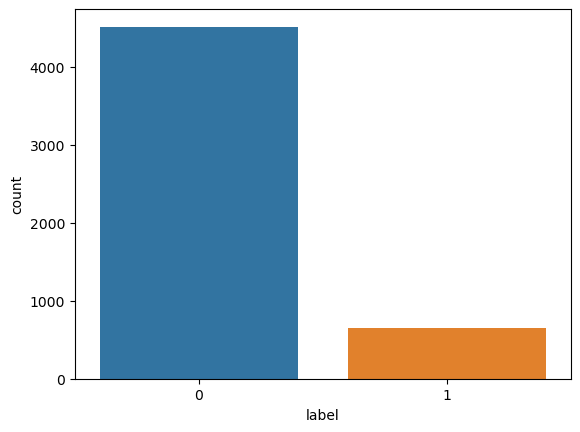

In [89]:
#plot ratio of ham vs spam
sns.countplot(df['label'])
plt.show()




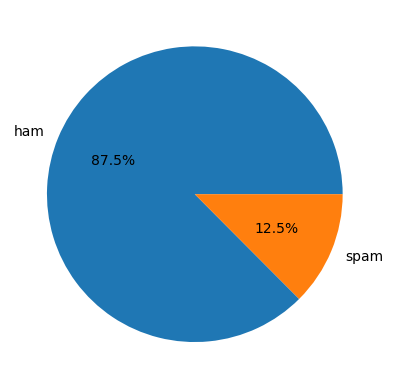

In [90]:
#plot piechart with ratio of ham vs spam
plt.pie(df['label'].value_counts(),labels=['ham','spam'],autopct='%0.1f%%')
plt.show()


In [91]:
#tokenize the above corpus with word_tokenize and store it in a column named num_words
df['num_words'] = df['email'].apply(lambda x: len(word_tokenize(x)))
df.head()


,label,email,num_words
0,0,"Go until jurong point, crazy.. Available only ...",24
1,0,Ok lar... Joking wif u oni...,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37
3,0,U dun say so early hor... U c already then say...,13
4,0,"Nah I don't think he goes to usf, he lives aro...",15


In [92]:
df['num_characters']=df['email'].apply(len)

In [93]:
df.head()

,label,email,num_words,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",24,111
1,0,Ok lar... Joking wif u oni...,8,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155
3,0,U dun say so early hor... U c already then say...,13,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61


In [94]:
#sent_tokenize and store it in a column named num_sent
df['num_sent'] = df['email'].apply(lambda x: len(sent_tokenize(x)))
df.head()

,label,email,num_words,num_characters,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2
1,0,Ok lar... Joking wif u oni...,8,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2
3,0,U dun say so early hor... U c already then say...,13,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1


In [95]:
#describe
df.describe()

,label,num_words,num_characters,num_sent
count,5163.000000,5163.000000,5163.000000,5163.000000
mean,0.125315,18.440635,79.117761,1.944606
std,0.331108,13.327096,58.315931,1.360322
min,0.000000,1.000000,2.000000,1.000000
25%,0.000000,9.000000,36.000000,1.000000
50%,0.000000,15.000000,60.000000,1.000000
75%,0.000000,26.000000,117.000000,2.000000
max,1.000000,220.000000,910.000000,28.000000


In [96]:
#describe ham
df[df['label']==0].describe()

,label,num_words,num_characters,num_sent
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,17.120903,70.655890,1.799601
std,0.0,13.493725,56.434262,1.278465
min,0.0,1.000000,2.000000,1.000000
25%,0.0,8.000000,34.000000,1.000000
50%,0.0,13.000000,53.000000,1.000000
75%,0.0,22.000000,90.000000,2.000000
max,0.0,220.000000,910.000000,28.000000


In [97]:
#describe spam
df[df['label']==1].describe()


,label,num_words,num_characters,num_sent
count,647.0,647.000000,647.000000,647.000000
mean,1.0,27.652241,138.180835,2.956723
std,0.0,7.034937,30.343387,1.479890
min,1.0,2.000000,13.000000,1.000000
25%,1.0,25.000000,132.000000,2.000000
50%,1.0,29.000000,149.000000,3.000000
75%,1.0,32.000000,158.000000,4.000000
max,1.0,46.000000,225.000000,8.000000


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


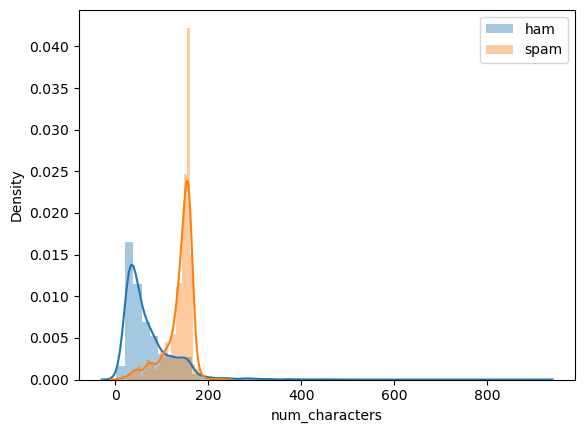

In [98]:
#plot histogram of num_characters for ham and spam using sns
sns.distplot(df[df['label']==0]['num_characters'],label='ham')
sns.distplot(df[df['label']==1]['num_characters'],label='spam')
plt.legend()
plt.show()

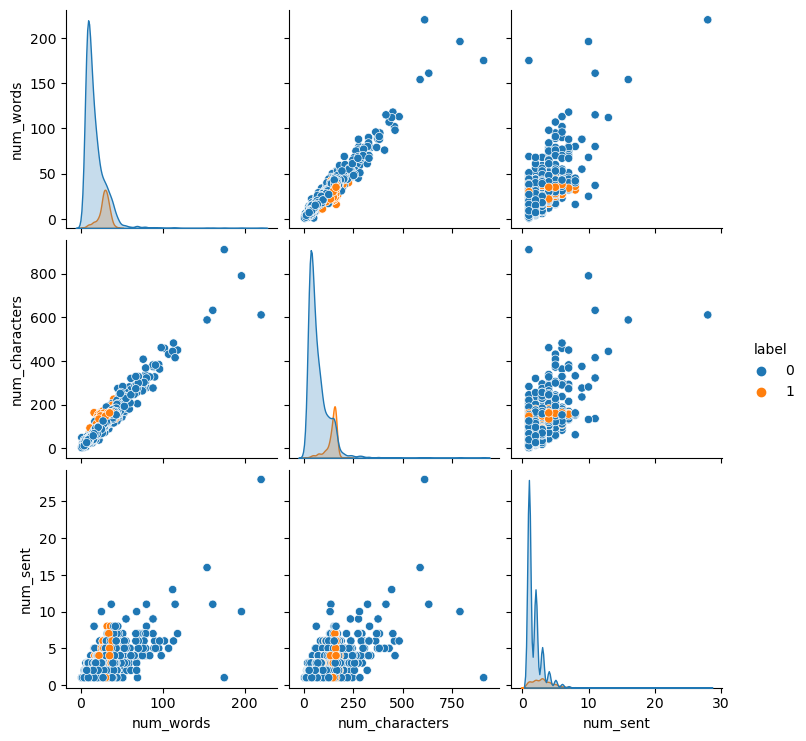

In [99]:
#pairplot
sns.pairplot(df,hue='label')
plt.show()

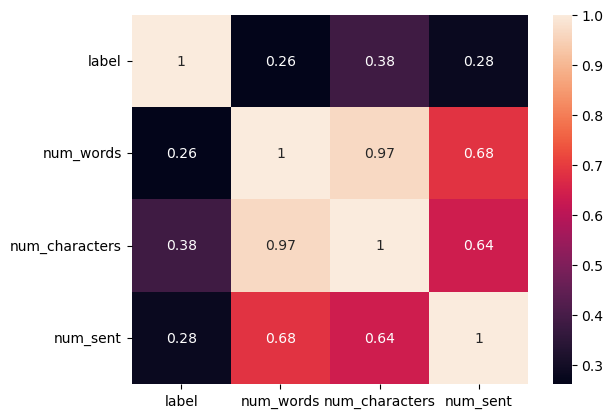

In [100]:
#correlation
df.corr()
#heatmap
sns.heatmap(df.corr(),annot=True)
plt.show()

In [101]:
#lower case
df['email'] = df['email'].apply(lambda x: x.lower())
df.head()

,label,email,num_words,num_characters,num_sent
0,0,"go until jurong point, crazy.. available only ...",24,111,2
1,0,ok lar... joking wif u oni...,8,29,2
2,1,free entry in 2 a wkly comp to win fa cup fina...,37,155,2
3,0,u dun say so early hor... u c already then say...,13,49,1
4,0,"nah i don't think he goes to usf, he lives aro...",15,61,1


In [102]:
#tokenization
df['email'] = df['email'].apply(lambda x: word_tokenize(x))
df.head()

,label,email,num_words,num_characters,num_sent
0,0,"[go, until, jurong, point, ,, crazy, .., avail...",24,111,2
1,0,"[ok, lar, ..., joking, wif, u, oni, ...]",8,29,2
2,1,"[free, entry, in, 2, a, wkly, comp, to, win, f...",37,155,2
3,0,"[u, dun, say, so, early, hor, ..., u, c, alrea...",13,49,1
4,0,"[nah, i, do, n't, think, he, goes, to, usf, ,,...",15,61,1


In [103]:
#remove special characters

df['email'] = df['email'].apply(lambda x: [re.sub(r'[^a-zA-Z0-9]','',i) for i in x])
df.head()

,label,email,num_words,num_characters,num_sent
0,0,"[go, until, jurong, point, , crazy, , availabl...",24,111,2
1,0,"[ok, lar, , joking, wif, u, oni, ]",8,29,2
2,1,"[free, entry, in, 2, a, wkly, comp, to, win, f...",37,155,2
3,0,"[u, dun, say, so, early, hor, , u, c, already,...",13,49,1
4,0,"[nah, i, do, nt, think, he, goes, to, usf, , h...",15,61,1


In [104]:
#remove stop words

stop_words = stopwords.words('english')
df['email'] = df['email'].apply(lambda x: [i for i in x if i not in stop_words])
df.head()


,label,email,num_words,num_characters,num_sent
0,0,"[go, jurong, point, , crazy, , available, bugi...",24,111,2
1,0,"[ok, lar, , joking, wif, u, oni, ]",8,29,2
2,1,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",37,155,2
3,0,"[u, dun, say, early, hor, , u, c, already, say, ]",13,49,1
4,0,"[nah, nt, think, goes, usf, , lives, around, t...",15,61,1


In [105]:
#remove punctuation

df['email'] = df['email'].apply(lambda x: [i for i in x if i not in string.punctuation])
df.head()

,label,email,num_words,num_characters,num_sent
0,0,"[go, jurong, point, crazy, available, bugis, n...",24,111,2
1,0,"[ok, lar, joking, wif, u, oni]",8,29,2
2,1,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",37,155,2
3,0,"[u, dun, say, early, hor, u, c, already, say]",13,49,1
4,0,"[nah, nt, think, goes, usf, lives, around, tho...",15,61,1


In [106]:
#stemming

ps = PorterStemmer()
df['email'] = df['email'].apply(lambda x: [ps.stem(i) for i in x])
df.head()


,label,email,num_words,num_characters,num_sent
0,0,"[go, jurong, point, crazi, avail, bugi, n, gre...",24,111,2
1,0,"[ok, lar, joke, wif, u, oni]",8,29,2
2,1,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",37,155,2
3,0,"[u, dun, say, earli, hor, u, c, alreadi, say]",13,49,1
4,0,"[nah, nt, think, goe, usf, live, around, though]",15,61,1


In [107]:
#store transformed text into df['transformed_text']
df['transformed_text'] = df['email']
df['transformed_text'] 


0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, 2, wkli, comp, win, fa, cup, fin...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4        [nah, nt, think, goe, usf, live, around, though]
                              ...                        
5567    [2nd, time, tri, 2, contact, u, u, 750, pound,...
5568                          [b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: transformed_text, Length: 5163, dtype: object

### using BOW

In [108]:
#conversion of text into numeric vector using BOW

cv = CountVectorizer(max_features=500)
X = cv.fit_transform(df['transformed_text'].apply(lambda x: ' '.join(x)))
X.shape


(5163, 500)

In [109]:
df.head()

,label,email,num_words,num_characters,num_sent,transformed_text
0,0,"[go, jurong, point, crazi, avail, bugi, n, gre...",24,111,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,"[ok, lar, joke, wif, u, oni]",8,29,2,"[ok, lar, joke, wif, u, oni]"
2,1,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",37,155,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,"[u, dun, say, earli, hor, u, c, alreadi, say]",13,49,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"[nah, nt, think, goe, usf, live, around, though]",15,61,1,"[nah, nt, think, goe, usf, live, around, though]"


In [110]:
y=df['label'].values

In [111]:
#split dataset into train and test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((4130, 500), (1033, 500), (4130,), (1033,))

0.9670861568247822,
0.896,
[[887  13]
 [ 21 112]],
0.8421052631578947,
0.868217054263566


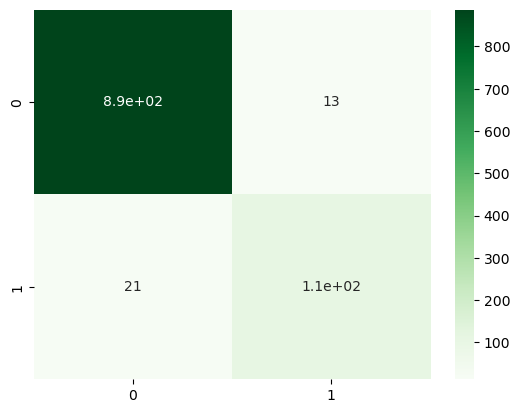

In [125]:
#train model using Naive Bayes
model = MultinomialNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred
print(f'{accuracy_score(y_test,y_pred)},\n{precision_score(y_test,y_pred)},\n{confusion_matrix(y_test,y_pred)},\n{recall_score(y_test,y_pred)},\n{f1_score(y_test,y_pred)}')
#get the heatmap of naive bayes
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap="Greens")
plt.show()

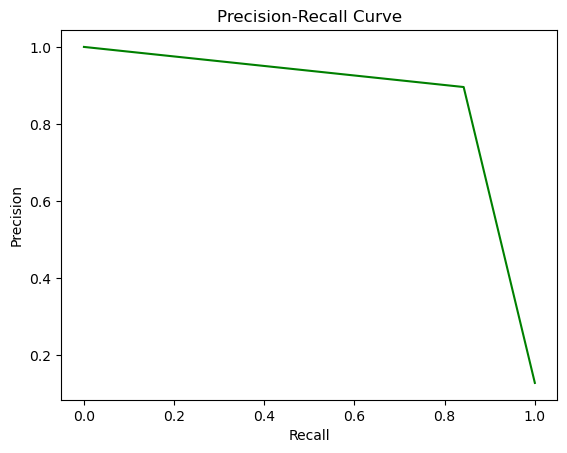

In [135]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision,'g')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
#train model with gaussian naive bayes
model = GaussianNB()
model.fit(X_train.toarray(),y_train)
y_pred = model.predict(X_test.toarray())
y_pred
print(f'{accuracy_score(y_test,y_pred)},\n{precision_score(y_test,y_pred)},\n{confusion_matrix(y_test,y_pred)},\n{recall_score(y_test,y_pred)},\n{f1_score(y_test,y_pred)}')

0.7347531461761858,
0.31876606683804626,
[[635 265]
 [  9 124]],
0.9323308270676691,
0.475095785440613


In [ ]:
#train model with bernoulli naive bayes
model = BernoulliNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred
print(f'{accuracy_score(y_test,y_pred)},\n{precision_score(y_test,y_pred)},\n{confusion_matrix(y_test,y_pred)}\n{recall_score(y_test,y_pred)},\n{f1_score(y_test,y_pred)}')

0.9777347531461762,
0.9824561403508771,
[[898   2]
 [ 21 112]]
0.8421052631578947,
0.9068825910931173


In [ ]:
# Find the accuracy score uding tfidf vectorizer

tfidf = TfidfVectorizer(max_features=2500)
X = tfidf.fit_transform(df['transformed_text'].apply(lambda x: ' '.join(x)))
X.shape

(5163, 2500)

### using Tf-Idf

In [ ]:
#conversion of text into numeric vector using Tf-Idf


tfidf = TfidfVectorizer(max_features=500)
X = tfidf.fit_transform(df['transformed_text'].apply(lambda x: ' '.join(x)))
X.shape

(5163, 500)

In [ ]:
df.head()

,label,email,num_words,num_characters,num_sent,transformed_text
0,0,"[go, jurong, point, crazi, avail, bugi, n, gre...",24,111,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,"[ok, lar, joke, wif, u, oni]",8,29,2,"[ok, lar, joke, wif, u, oni]"
2,1,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",37,155,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,"[u, dun, say, earli, hor, u, c, alreadi, say]",13,49,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"[nah, nt, think, goe, usf, live, around, though]",15,61,1,"[nah, nt, think, goe, usf, live, around, though]"


In [ ]:
#split dataset into train and test
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4130, 500), (1033, 500), (4130,), (1033,))

In [ ]:
#train model using Naive Bayes
model = MultinomialNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred
print(accuracy_score(y_test,y_pred),
precision_score(y_test,y_pred),
confusion_matrix(y_test,y_pred))

0.9719264278799613 0.9814814814814815 [[898   2]
 [ 27 106]]


In [ ]:
#train model with gaussian naive bayes
model = GaussianNB()
model.fit(X_train.toarray(),y_train)
y_pred = model.predict(X_test.toarray())
y_pred
print(accuracy_score(y_test,y_pred),
precision_score(y_test,y_pred),
confusion_matrix(y_test,y_pred))

0.7347531461761858 0.31876606683804626 [[635 265]
 [  9 124]]


In [ ]:
#train model with bernoulli naive bayes
model = BernoulliNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred
print(accuracy_score(y_test,y_pred),
precision_score(y_test,y_pred),
confusion_matrix(y_test,y_pred))

0.9777347531461762 0.9824561403508771 [[898   2]
 [ 21 112]]


In [ ]:
# Find the accuracy score uding tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2500)
X = tfidf.fit_transform(df['transformed_text'].apply(lambda x: ' '.join(x)))
X.shape

(5163, 2500)